# Bayesian Inference: Activity 4
Prof.Valerio Marra

**Renan Alves de Oliveira**

*2019*

1. Using $f(\theta|D) = f_5(\theta)$ of equation (2.142) ($\chi^2$ distribution with 5 d.o.f.), get $\{\tilde{x}^L_n,\mathrm{median},\tilde{x}^R_n\}$ and $\{x^L_n,\mathrm{mode},x^R_n\}$ and plot a figure similar to Figure 3.4.

In [2]:
# Load packages:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.stats import chi2
%matplotlib inline

from matplotlib import rc, rcParams
rc('text', usetex='True') 
rcParams.update({'font.size': 22})

First, lets plot $f_5(\theta)$:

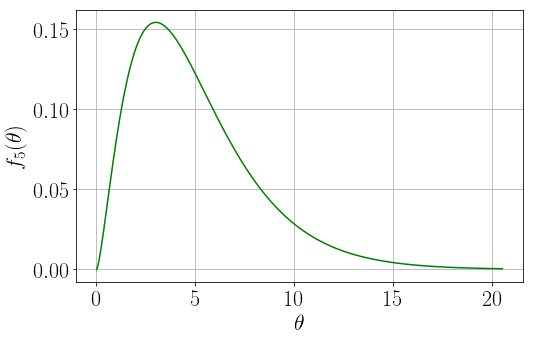

In [3]:
df = 5 # Degrees of Freedom

x = np.linspace(chi2.ppf(0.00, df),
                chi2.ppf(0.999, df), 1000)

pdf = chi2.pdf(x, df)

plt.figure(figsize=(8,5))
plt.plot(x, pdf, color='g')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f_5(\theta)$')
plt.grid()
plt.show()

It's really easy to find $\tilde{x}^L_n$, median, and $\tilde{x}^R_n$ using the quantile function specifying the $q-$th quantile. We can use whether random values drawn from a $\chi^2_5$ distribution or simply using the `ppf` method:

In [4]:
# Drawn several random values:
rvs = chi2.rvs(df, size=10000)

print(np.quantile(rvs, 0.5)) # If I increase sample size, I get close to the real value.
chi2.ppf(0.5, df) # We will use option method because its more precise.

4.351081853109967


4.351460191095526

Since we want: $F^{-1}(\{\alpha_n/2,1/2,1-\alpha_n/2\})=\{\tilde{x}^L_n,\mathrm{median},\tilde{x}^R_n\}$, we must specify our interval of convergence. Let's suppose we want $2-\sigma$ region:
$$1-\alpha_2=p_{2\sigma}=\mathrm{erf}(\frac{2}{\sqrt{2}})\rightarrow \alpha_2=1-\mathrm{erf}(\frac{2}{\sqrt{2}})\approx0.0455$$

In [5]:
alpha_2 = 1 - erf(2/np.sqrt(2))
x_tilde_L_n = chi2.ppf(alpha_2/2, df)
median = chi2.ppf(0.5, df)
x_tilde_R_n = chi2.ppf(1 - alpha_2/2, df)

Just to compare, let's check the median using the quantile method and the "theoretical" method:

In [6]:
print(median)
print(chi2.median(df))

4.351460191095526
4.351460191095526


There is a much faster method called `interval` which does the same as the quantile function. You just need to tell which $1 - \alpha$ you want:

In [7]:
print(chi2.interval(1 - alpha_2, df))
print(x_tilde_L_n,x_tilde_R_n)

(0.7965973430947467, 13.06796360704866)
0.7965973430947467 13.06796360704866


Now, let's plot the blue parts from our graphic:

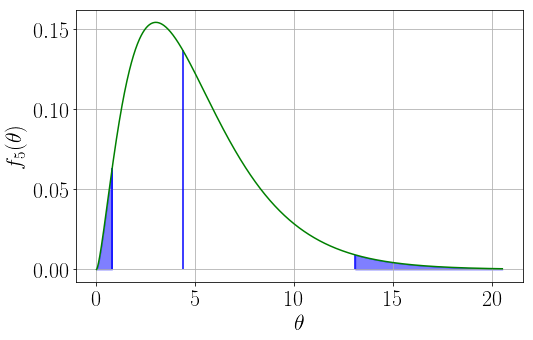

In [8]:
plt.figure(figsize=(8,5))
plt.plot(x, pdf, color='g')

plt.vlines(x=x_tilde_L_n, ymin=0, ymax=chi2.pdf(x_tilde_L_n, df), color='b')
plt.vlines(x=median, ymin=0, ymax=chi2.pdf(median, df), color='b')
plt.vlines(x=x_tilde_R_n, ymin=0, ymax=chi2.pdf(x_tilde_R_n, df), color='b')

plt.fill_between(x, pdf, where=(x <= x_tilde_L_n), color='b', alpha=0.5)
plt.fill_between(x, pdf, where=(x >= x_tilde_R_n), color='b', alpha=0.5)

plt.xlabel(r'$\theta$')
plt.ylabel(r'$f_5(\theta)$')
plt.grid()
plt.show()

Now, we want to obtain $\{x^L_n,\mathrm{mode},x^R_n\}$. Since using the `ppf` method gives an error about 2%, to estimate either $x^R_n$ and $x^R_n$ let's do the following:
1. Set the interval that lies the distribution function, which I've choosen the `max value` to be 30 (any point after that has almost zero probability).

In [9]:
x = np.linspace(0, 30, 1000000)
pdf_x = chi2.pdf(x, df=5)

2. And we should obtain the same plot from input `3`. This is method is more precise than bining because it doesn't require any binning size and number of bins.
3. Find the `max` of the sum of all values that the distribution can assume in the selected range:

In [10]:
sum_pdf_x = np.sum(pdf_x)

4. And normalize the `pdf_x` in such that when you sum all values of `pdf_x` you obtain 1.

In [11]:
normalized_pdf_x = pdf_x/sum_pdf_x

5. Put all pairs `{x, f(x)}` in a single array:

In [12]:
L = np.vstack((x, normalized_pdf_x)).T

6. Sort all values from decreasing order in `f(x)` values:

In [13]:
sorted_list = L[L[:,1].argsort()][::-1]

7. Make a cumulative sum of all sorted values:

In [14]:
suma = np.cumsum(sorted_list[:,1])

8. Find here this sum converges to $2\sigma$, or the desired confidence interval, and print either $x^R_n$ or $x^R_n$

In [15]:
confidence_interval = 2 # In sigma units
value = sorted_list[np.where(suma <= erf(confidence_interval/np.sqrt(2)))[0][-1]][0]
print(value)

0.27798027798027797


This would be $x^L_n$, and lets find what is $f_5(\theta=x^L_n)$, and call it `height`:

In [16]:
x_L_n = value
height = chi2.pdf(x_L_n, df=5)
print(height)

0.016960831438043254


Finally, we must find $x^R_n$. This can be found asking which values of $\theta$ I get the same height:

In [17]:
from scipy.special import gamma
from scipy.optimize import fsolve

In [18]:
func = lambda theta : height - (1/(2**(df/2)*gamma(5/2)))*theta**((df/2) - 1)*np.exp(- theta/2) # 1 - Distribution.

# Use the numerical solver to find the roots:
theta_initial_guess = 11.5
solution = fsolve(func, theta_initial_guess)
solution

array([11.42636612])

In [19]:
x_R_n = solution[0]

To complete our plot, we must find the mode, which can be easily calculated using `max` method:

In [20]:
mode = np.max(pdf)
mode

0.1541802876484344

To find which value of $\theta$ for the mode, we can use a derivative of the distribution or numerically. Lets do it numerically:

In [21]:
func_2 = lambda theta : mode - (1/(2**(df/2)*gamma(5/2)))*theta**((df/2) - 1)*np.exp(- theta/2) # 1 - Distribution.

# Use the numerical solver to find the roots:
mode_initial_guess = 3
solution = fsolve(func_2, mode_initial_guess)
print(solution[0])

x_mode = solution[0]

3.001811714827531


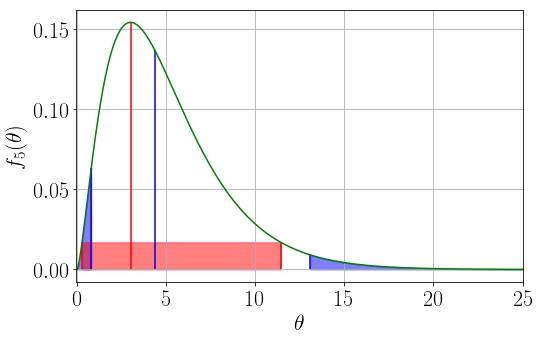

In [22]:
plt.figure(figsize=(8,5))
plt.plot(x, pdf_x, color='g')

plt.vlines(x=x_tilde_L_n, ymin=0, ymax=chi2.pdf(x_tilde_L_n, df), color='b')
plt.vlines(x=median, ymin=0, ymax=chi2.pdf(median, df), color='b')
plt.vlines(x=x_tilde_R_n, ymin=0, ymax=chi2.pdf(x_tilde_R_n, df), color='b')

plt.fill_between(x, pdf_x, where=(x <= x_tilde_L_n), color='b', alpha=0.5)
plt.fill_between(x, pdf_x, where=(x >= x_tilde_R_n), color='b', alpha=0.5)

plt.vlines(x=x_L_n, ymin=0, ymax=chi2.pdf(x_L_n, df), color='r')
plt.vlines(x=x_mode, ymin=0, ymax=chi2.pdf(x_mode, df), color='r')
plt.vlines(x=x_R_n, ymin=0, ymax=chi2.pdf(x_R_n, df), color='r')

plt.fill_between(np.linspace(x_L_n, x_R_n, 1000), height, color='r', alpha=0.5)

plt.xlim(-0.05,25)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f_5(\theta)$')
plt.grid()
plt.show()

To summarize our results:
$$\left\{ \tilde{x}_{n}^{R},\mathrm{median},\tilde{x}_{n}^{L}\right\} 	=	\left\{ 0.796,4.351,13.067\right\},\\
\left\{ x_{n}^{R},\mathrm{mode},x_{n}^{L}\right\} 	=	\left\{ 0.278,3,11.426\right\}.$$